## Data Mining and Machine Learning
##  Multiple Regression and Feature selection
### Edgar   Acuna

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import log,pi
import statsmodels.formula.api as smf
%matplotlib inline

In [27]:
#Ejemplo 1: Variable de respuesta mpg: millaje por galon, variables predictoras: wt, vol,sp y hp
data1=pd.read_csv("http://academic.uprm.edu/eacuna/millaje.txt",sep="\s+")
data1.head()

,mpg,sp,wt,vol,hp
0,65.4,96,17.5,89,49
1,56.0,97,20.0,92,55
2,55.9,97,20.0,92,55
3,49.0,105,20.0,92,70
4,46.5,96,20.0,92,53


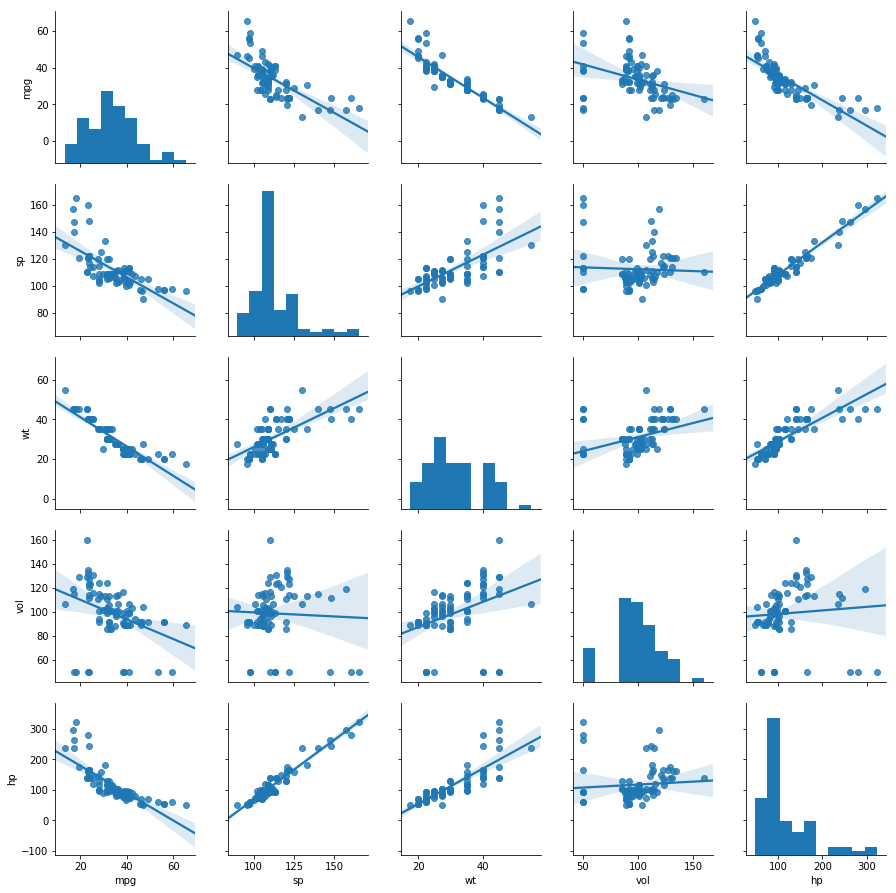

In [28]:
#Haciendo el sactterplot matricial usando seaborn
sns.pairplot(data1,kind="reg")

In [29]:
data1.corr()

,mpg,sp,wt,vol,hp
mpg,1.000000,-0.688446,-0.905085,-0.368614,-0.789856
sp,-0.688446,1.000000,0.678534,-0.043062,0.966545
wt,-0.905085,0.678534,1.000000,0.384954,0.832220
vol,-0.368614,-0.043062,0.384954,1.000000,0.076479
hp,-0.789856,0.966545,0.832220,0.076479,1.000000


Comentario: La variable predictora mas correlacionada con la variable de espuesta mpg es wt y la menos correlacionada es vol 

In [30]:
#haciendo la regresion de mpg con las 4 variables predictoras
regall=smf.ols(formula='mpg~sp+wt+vol+hp',data=data1).fit()
print regall.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     132.7
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           9.98e-34
Time:                        18:37:04   Log-Likelihood:                -220.00
No. Observations:                  82   AIC:                             450.0
Df Residuals:                      77   BIC:                             462.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.4378     23.532      8.178      0.0

Comentario: 

Interpretacion de los coeficientes:

B1=-1.2948 significa que si la velocidad maxima aumenta en una unidad(m/h)se espera que el rendimiento en millas por galon baje en 1.29 asumiendo que las otras variables permanecen constante.

B2=-1.85 significa que si el peso del carro aumenta en una unidad (100 lb)se espera que el rendimiento en millas por galon disminuya en 1.85 asumiendo que las otras variables permanecen constante.

B3=-.01 significa que si el volumen interior del carro aumenta en una unidad (pie cubico) se espera que el rendimiento en millas por galon disminuya en .01 asumiendo que las otras variables permanecen constante.

B4=0.39 significa que si la potencia del motor aumenta en una unidad se espera que que el rendimiento en millas por galon aumente  en .39 asumiendo que las otras variables permanecen constante.

Notar que el p-value de la prueba de t para la variable vol es mayor que .05 lo cual indica que dicha
    variable no es importante para predecir el mpg

In [31]:
reg3=smf.ols(formula='mpg~sp+wt+hp',data=data1).fit()
print reg3.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     177.9
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           8.66e-35
Time:                        18:37:04   Log-Likelihood:                -220.25
No. Observations:                  82   AIC:                             448.5
Df Residuals:                      78   BIC:                             458.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    194.1296     23.322      8.324      0.0

In [32]:
#Prediccion usando el modelo de regresion
pred=regall.predict(pd.DataFrame({'sp': [100], 'wt':[20], 'vol': [100], 'hp': [50]}))
print "El mpg predicho es:",pred[0]

El mpg predicho es: 43.8059456465


In [33]:
#calculo del criterio de Akaike usando todas las predictoras para seleccion de variables
sse=regall.ssr
akaike=82*(log(2*pi*sse/77)+1)+5
print akaike

450.164899161


In [34]:
#Hallando el AIC del modelo de regresion sin incluir la variable wt
regall=smf.ols(formula='mpg~sp+vol+hp',data=data1).fit().aic
print regall

504.298793532


In [35]:
#Hallando el AIC del modelo de regresion sin incluir la variable sp
regall=smf.ols(formula='mpg~wt+vol+hp',data=data1).fit().aic
print regall

473.425127596


In [36]:
#Hallando el AIC del modelo de regresion sin incluir la variable hp
regall=smf.ols(formula='mpg~sp+wt+vol',data=data1).fit().aic
print regall

469.609310721


In [37]:
#Hallando el AIC del modelo de regresion sin incluir la variable Vol
regall=smf.ols(formula='mpg~sp+wt+hp',data=data1).fit().aic
print regall

448.504759815


In [38]:
#Hallando el AIC del modelo de regresion sin incluir las variables Vol y hp
regall=smf.ols(formula='mpg~sp+wt',data=data1).fit().aic
print regall

470.38102242


In [39]:
#Hallando el AIC del modelo de regresion sin incluir la variable Vol y sp
regall=smf.ols(formula='mpg~wt+hp',data=data1).fit().aic
print regall

473.155827022


In [40]:
#Hallando el AIC del modelo de regresion sin incluir la variable Vol y wt
regall=smf.ols(formula='mpg~sp+hp',data=data1).fit().aic
print regall

514.080231665


Comentario: Segun el criterio AIC de Akaike el mejor modelo es aquel que incluye a las variables wt, sp y hp, porque tiene el AIC menor de todos los modelos 

In [41]:
#Funcion auxiliar que para generar una formula excluyendo una variable
def ols_formula(df, dependent_var, excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [42]:
def back1(data,best_candidate,response,remaining,current_score):
        scores_with_candidates=[]
        #step 2
        data1=data.drop(best_candidate,axis=1)
        for candidate in remaining:
            formula=ols_formula(data1,response,[candidate])
            score = smf.ols(formula, data1).fit().aic
            scores_with_candidates.append((score,candidate))
        scores_with_candidates.sort(reverse=True)
        worst_new_score, best_candidate = scores_with_candidates.pop()
        print "Feature considered for elimination in this step:",best_candidate 
        if current_score>worst_new_score:
            remaining.remove(best_candidate)
            current_score = worst_new_score
        return remaining, current_score

In [43]:
#Funcion para hacer backward selection 
def backward_elimination(data,response):
    #Step 0
    formula=ols_formula(data,response,"")
    result = smf.ols(formula, data).fit().aic
    remaining = list(data.columns)
    remaining.remove(response)
    current_score, worst_new_score = result, result
    print 'AIC including all the features\n', current_score
    scores_with_candidates = []
    #Step 1
    for candidate in remaining:
        formula=ols_formula(data,response,[candidate])
        score = smf.ols(formula, data).fit().aic
        scores_with_candidates.append((score,candidate))
    scores_with_candidates.sort(reverse=True)
    worst_new_score, best_candidate = scores_with_candidates.pop()
    print "Feature considered for elimination in this step:",best_candidate, "\nAIC",worst_new_score,"\n"   
    if current_score<worst_new_score:
        print " Ended at step 1: all the features are important"
    else:
        remaining.remove(best_candidate)
        current_score = worst_new_score
        aic1=current_score
        #print "ac1", aic1
        for step in range (0,8):
            back1(data,best_candidate,response,remaining,current_score)
            formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))
            aic2=smf.ols(formula, data).fit().aic
            #print "aic2", aic2
            if aic2>=aic1:
                break
            else:
                aic1=aic2
                print "AIC=",aic1
    print "best AIC:", aic1, "\n","Best Features:", remaining
    formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))
    print formula
    model = smf.ols(formula, data).fit()
    return model

In [44]:
backward_elimination(data1,'mpg')

AIC including all the features
450.005965477
Feature considered for elimination in this step: vol 
AIC 448.504759815 

Feature considered for elimination in this step: hp
best AIC: 448.504759815 
Best Features: ['sp', 'wt', 'hp']
mpg ~ sp + wt + hp + 1


In [46]:
#Ejemplo 2: variable de respuesta grasa: porcentaje de grasa en el cuerpo, variable predictoras: edad, peso,
#altura y circunferencias de cuello, pecho, cadera,abdomen, biceps, muslo,rodilla,tobillo,antebrazo y muneca 
data2=pd.read_csv("http://academic.uprm.edu/eacuna/grasa.txt",sep="\s+")
data2.head()

,grasa,edad,peso,altura,cuello,pecho,abdomen,cadera,muslo,rodilla,tobillo,biceps,antebrazo,muneca
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [47]:
model=backward_elimination(data2,"grasa")
print model

AIC including all the features
1464.50237446
Feature considered for elimination in this step: rodilla 
AIC 1462.50659712 

Feature considered for elimination in this step: pecho
AIC= 1460.57130604
Feature considered for elimination in this step: altura
AIC= 1459.06626108
Feature considered for elimination in this step: tobillo
AIC= 1457.82217075
Feature considered for elimination in this step: biceps
AIC= 1456.99638198
Feature considered for elimination in this step: cadera
best AIC: 1456.99638198 
Best Features: ['edad', 'peso', 'cuello', 'abdomen', 'cadera', 'muslo', 'antebrazo', 'muneca']
grasa ~ edad + peso + cuello + abdomen + cadera + muslo + antebrazo + muneca + 1


In [54]:
backbest=smf.ols(formula='grasa ~ edad + peso + cuello + abdomen + cadera + muslo + antebrazo + muneca',data=data2).fit()
print backbest.params

Intercept   -22.656373
edad          0.065780
peso         -0.089853
cuello       -0.466558
abdomen       0.944815
cadera       -0.195435
muslo         0.302392
antebrazo     0.515721
muneca       -1.536652
dtype: float64


In [56]:
print 'R2=', backbest.rsquared

R2= 0.746554022383


In [57]:
#Haciendo backward elimination usando el modulo mlxtend y scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np
import itertools
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
X=np.asarray(data1[['sp','wt','vol','hp']])
y=np.asarray(data1['mpg'])
X1=np.asarray(data2[['edad','peso','altura','cuello','pecho','abdomen','cadera','muslo','rodilla','tobillo','biceps','antebrazo','muneca']])
y1=np.asarray(data2['grasa'])
lr = LinearRegression()

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [58]:
#Aplicandolo a millaje
a=SFS(lr, k_features=3, forward=False, floating=False, verbose=0, cv=None)
a.fit(X,y)
a.subsets_

{3: {'avg_score': 0.8725063568724144,
  'cv_scores': array([ 0.87250636]),
  'feature_idx': (0, 1, 3)},
 4: {'avg_score': 0.87327952864068092,
  'cv_scores': array([ 0.87327953]),
  'feature_idx': (0, 1, 2, 3)}}

Comentario: Las 3 variables que quedarian serian: sp(0), wt(1) y hp(3). La  variable eliminada es la variable  vol (2) 

In [59]:
#Aplicandolo a grasa
a1=SFS(lr, k_features=5, forward=False, floating=False, verbose=0, cv=None)
a1.fit(X1,y1)
a1.subsets_

{5: {'avg_score': 0.73719345376986056,
  'cv_scores': array([ 0.73719345]),
  'feature_idx': (0, 1, 5, 11, 12)},
 6: {'avg_score': 0.74096805520996267,
  'cv_scores': array([ 0.74096806]),
  'feature_idx': (0, 1, 5, 7, 11, 12)},
 7: {'avg_score': 0.74447629513568958,
  'cv_scores': array([ 0.7444763]),
  'feature_idx': (0, 1, 3, 5, 7, 11, 12)},
 8: {'avg_score': 0.74655402238334734,
  'cv_scores': array([ 0.74655402]),
  'feature_idx': (0, 1, 3, 5, 6, 7, 11, 12)},
 9: {'avg_score': 0.74773222415907603,
  'cv_scores': array([ 0.74773222]),
  'feature_idx': (0, 1, 3, 5, 6, 7, 10, 11, 12)},
 10: {'avg_score': 0.74848780326069209,
  'cv_scores': array([ 0.7484878]),
  'feature_idx': (0, 1, 3, 5, 6, 7, 9, 10, 11, 12)},
 11: {'avg_score': 0.74898131539233059,
  'cv_scores': array([ 0.74898132]),
  'feature_idx': (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12)},
 12: {'avg_score': 0.74904576404490575,
  'cv_scores': array([ 0.74904576]),
  'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)},
 13: {'

Comentario: las 5 variables que quedarian serian: edad(0), peso(1), abdomen(5), antebrazo(11) y muneca(12)

In [ ]:
#Eligiendo la predictora mejor correlacionada con mpg y haciendo la regresion
reg1=smf.ols(formula='mpg~wt', data=data1).fit()
print reg1.summary()

In [ ]:
#Considerando la segunda mejor variable junto con la primera
reg2_r2a=smf.ols(formula='mpg~wt+sp', data=data1).fit().rsquared_adj
print reg2_r2a

In [ ]:
#Considerando la tercera mejor variable
reg3_r2a=smf.ols(formula='mpg~sp+wt+hp', data=data1).fit().rsquared_adj
print reg3_r2a

In [ ]:
#Considerando la tercera mejor variable
reg3_r2a=smf.ols(formula='mpg~sp+wt+hp+vol', data=data1).fit().rsquared_adj
print reg3_r2a

In [62]:
# Haciendo una funcion que seleccione las mejores variables usando Forward pero con el AIC
def forward_aic_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000.0, 10000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print best_new_score, best_candidate
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
#Aplicando el methodo forward con AIC al dataset millaje
model=forward_aic_selection(data1,"mpg")
print model.model.formula
print model.aic

Comentario: La ultima variable vol no es incluida

In [63]:
model=forward_aic_selection(data2,"grasa")
print model.model.formula
print model.aic

1515.79033747 abdomen
1471.18477769 peso
1465.04121338 muneca
1460.219691 antebrazo
1459.44186161 cuello
1458.80625316 edad
1457.05383331 muslo
1456.99638198 cadera
1457.82217075 biceps
grasa ~ abdomen + peso + muneca + antebrazo + cuello + edad + muslo + cadera + 1
1456.99638198


In [ ]:
#Aplicando el metodo forward con el criterio de r2-ajustado
import statsmodels.formula.api as smf

def forward_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print best_new_score, best_candidate
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model=forward_selection(data1,"mpg")
print model.model.formula
print model.rsquared_adj

In [ ]:
model=forward_selection(data2,"grasa")
print model.model.formula
print model.rsquared